# Chronic Kidney Disease

This is a binary classification problem.  In part, we compare XGBoost with decision trees as base learners (trees added on) with SKLearn's random forest model (trees grown in parallel).

In [96]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [97]:
ckd_df = pd.read_csv('chronic_kidney_disease.csv', names=['age', 'bp', 'sg', 'al', 'su',
                                                          'rbc', 'pc', 'pcc', 'ba', 'bgr',
                                                          'bu', 'sc', 'sod', 'pot', 'hemo',
                                                          'pcv', 'wc', 'rc', 'htn', 'dm',
                                                          'cad', 'appet', 'pe', 'ane', 'ckd_yn'])

In [98]:
ckd_clean_1 = ckd_df.replace('?', np.NaN)
print(ckd_clean_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age       391 non-null object
bp        388 non-null object
sg        353 non-null object
al        354 non-null object
su        351 non-null object
rbc       248 non-null object
pc        335 non-null object
pcc       396 non-null object
ba        396 non-null object
bgr       356 non-null object
bu        381 non-null object
sc        383 non-null object
sod       313 non-null object
pot       312 non-null object
hemo      348 non-null object
pcv       329 non-null object
wc        294 non-null object
rc        269 non-null object
htn       398 non-null object
dm        398 non-null object
cad       398 non-null object
appet     399 non-null object
pe        399 non-null object
ane       399 non-null object
ckd_yn    400 non-null object
dtypes: object(25)
memory usage: 78.2+ KB
None


In [99]:
ckd_clean_2 = ckd_clean_1.apply(pd.to_numeric, errors='ignore')

In [100]:
ckd_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age       391 non-null float64
bp        388 non-null float64
sg        353 non-null float64
al        354 non-null float64
su        351 non-null float64
rbc       248 non-null object
pc        335 non-null object
pcc       396 non-null object
ba        396 non-null object
bgr       356 non-null float64
bu        381 non-null float64
sc        383 non-null float64
sod       313 non-null float64
pot       312 non-null float64
hemo      348 non-null float64
pcv       329 non-null float64
wc        294 non-null float64
rc        269 non-null float64
htn       398 non-null object
dm        398 non-null object
cad       398 non-null object
appet     399 non-null object
pe        399 non-null object
ane       399 non-null object
ckd_yn    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


In [101]:
X = ckd_clean_2.iloc[:,:-1]
y = ckd_clean_2.iloc[:,-1]

In [103]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # pd.get_dummies

## Imputing for numerical features

In [109]:
X_clean_1 = X.fillna(X.median())

In [110]:
X_clean_1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.40,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,11.30,38.0,6000.0,4.8,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.60,31.0,7500.0,4.8,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.20,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.60,35.0,7300.0,4.6,no,no,no,good,no,no
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,12.20,39.0,7800.0,4.4,yes,yes,no,good,yes,no
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,12.40,36.0,8000.0,4.8,no,no,no,good,no,no
7,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,12.40,44.0,6900.0,5.0,no,yes,no,good,yes,no
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,10.80,33.0,9600.0,4.0,yes,yes,no,good,no,yes
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,9.50,29.0,12100.0,3.7,yes,yes,no,poor,no,yes


## Imputing for categorical features

In [106]:
# Import necessary modules
# from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer

In [107]:
imputer = CategoricalImputer() # imputes the mode

In [115]:
X_clean_1.rbc = imputer.fit_transform(X_clean_1.rbc)
X_clean_1.pc = imputer.fit_transform(X_clean_1.pc)
X_clean_1.pcc = imputer.fit_transform(X_clean_1.pcc)
X_clean_1.ba = imputer.fit_transform(X_clean_1.ba)
X_clean_1.htn = imputer.fit_transform(X_clean_1.htn)
X_clean_1.dm = imputer.fit_transform(X_clean_1.dm)
X_clean_1.cad = imputer.fit_transform(X_clean_1.cad)
X_clean_1.appet = imputer.fit_transform(X_clean_1.appet)
X_clean_1.pe = imputer.fit_transform(X_clean_1.pe)
X_clean_1.ane = imputer.fit_transform(X_clean_1.ane)
# Do this with a for loop!

In [116]:
X_clean_1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,15.40,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,11.30,38.0,6000.0,4.8,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.60,31.0,7500.0,4.8,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.20,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.60,35.0,7300.0,4.6,no,no,no,good,no,no
5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.0,...,12.20,39.0,7800.0,4.4,yes,yes,no,good,yes,no
6,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,12.40,36.0,8000.0,4.8,no,no,no,good,no,no
7,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,12.40,44.0,6900.0,5.0,no,yes,no,good,yes,no
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,10.80,33.0,9600.0,4.0,yes,yes,no,good,no,yes
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,9.50,29.0,12100.0,3.7,yes,yes,no,poor,no,yes


## Creating Dummies

In [163]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary
X_dict = X_clean_1.to_dict(orient="records")

# Create the DictVectorizer object
dv = DictVectorizer(sparse=False)

# Apply dv on df
X_encoded = dv.fit_transform(X_dict)

print(X_encoded[:,5]) # appet=poor

print(X_encoded.shape)

# Print the vocabulary
print(dv.vocabulary_)

print(type(X_encoded))

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [123]:
# Create a boolean mask for categorical columns
categorical_feature_mask = (X.dtypes == object)

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

print(categorical_feature_mask)
print(categorical_columns)

age      False
bp       False
sg       False
al       False
su       False
rbc       True
pc        True
pcc       True
ba        True
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wc       False
rc       False
htn       True
dm        True
cad       True
appet     True
pe        True
ane       True
dtype: bool
['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [132]:
le = LabelEncoder()

y_int = le.fit_transform(y)

## XGB Cross Validation

In [144]:
# Create the DMatrix
ckd_dmatrix = xgb.DMatrix(data=X_encoded, label=y_int)

# Create the parameter dictionary
params = {"objective":"reg:logistic", "max_depth":3}
# binary:logistic

# Perform cross_validation
cv_results = xgb.cv(dtrain=ckd_dmatrix, params=params, nfold=3, metrics="auc", as_pandas=True, seed=123)
# early_stopping_rounds = , num_boost_round =

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0       0.976655      0.009128        0.989921       0.000959
1       0.984915      0.007480        0.994796       0.003613
2       0.983837      0.007789        0.996316       0.002458
3       0.983761      0.007451        0.998781       0.001114
4       0.983079      0.007738        0.999144       0.000727
5       0.993267      0.001934        0.999406       0.000460
6       0.993581      0.002265        0.999588       0.000245
7       0.997437      0.000379        0.999869       0.000145
8       0.998785      0.000614        0.999889       0.000157
9       0.998618      0.000965        0.999939       0.000086
0.9986183333333333


### Accuracy as metric

In [145]:
# Perform cross-validation: cv_results
cv_results_err = xgb.cv(dtrain=ckd_dmatrix, params=params, nfold=3, metrics="error", as_pandas=True, seed=123)
# Why not accuracy directly?

# Print cv_results
print(cv_results_err)

# Print the accuracy
print(((1-cv_results_err["test-error-mean"]).iloc[-1]))

   test-error-mean  test-error-std  train-error-mean  train-error-std
0         0.037538        0.010713          0.022500         0.003058
1         0.035032        0.009453          0.018745         0.005283
2         0.035032        0.009453          0.019998         0.004665
3         0.030019        0.006208          0.015005         0.005313
4         0.027513        0.007129          0.015005         0.005313
5         0.027513        0.007129          0.013752         0.004676
6         0.025025        0.009418          0.012499         0.004668
7         0.020012        0.003597          0.006242         0.006366
8         0.020012        0.003597          0.004994         0.004671
9         0.020012        0.003597          0.002497         0.003531
0.9799876666666667


## Hyperparameter Tuning

In [143]:
xgb_clf = xgb.XGBClassifier()

from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
gbm_param_grid = {
    'learning_rate': np.arange(0.05, 1.05, 0.05),
    'max_depth': range(3, 11),
    'n_estimators': np.arange(50, 250, 50) # number of boosting rounds
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=xgb_clf, param_distributions=gbm_param_grid, n_iter=5, scoring="roc_auc", cv=3, verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X_encoded, y_int)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)
print(randomized_roc_auc.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
0.9987195065978198
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
{'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.5}


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished


## Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier
# DecisionTreeClassifier for single tree
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier()

scores = cross_val_score(rf_clf,X_encoded,y_int,scoring="roc_auc",cv=10)

In [142]:
final_avg = np.mean(scores)

print(final_avg)

0.9989333333333335


## XGB Tree Visualization

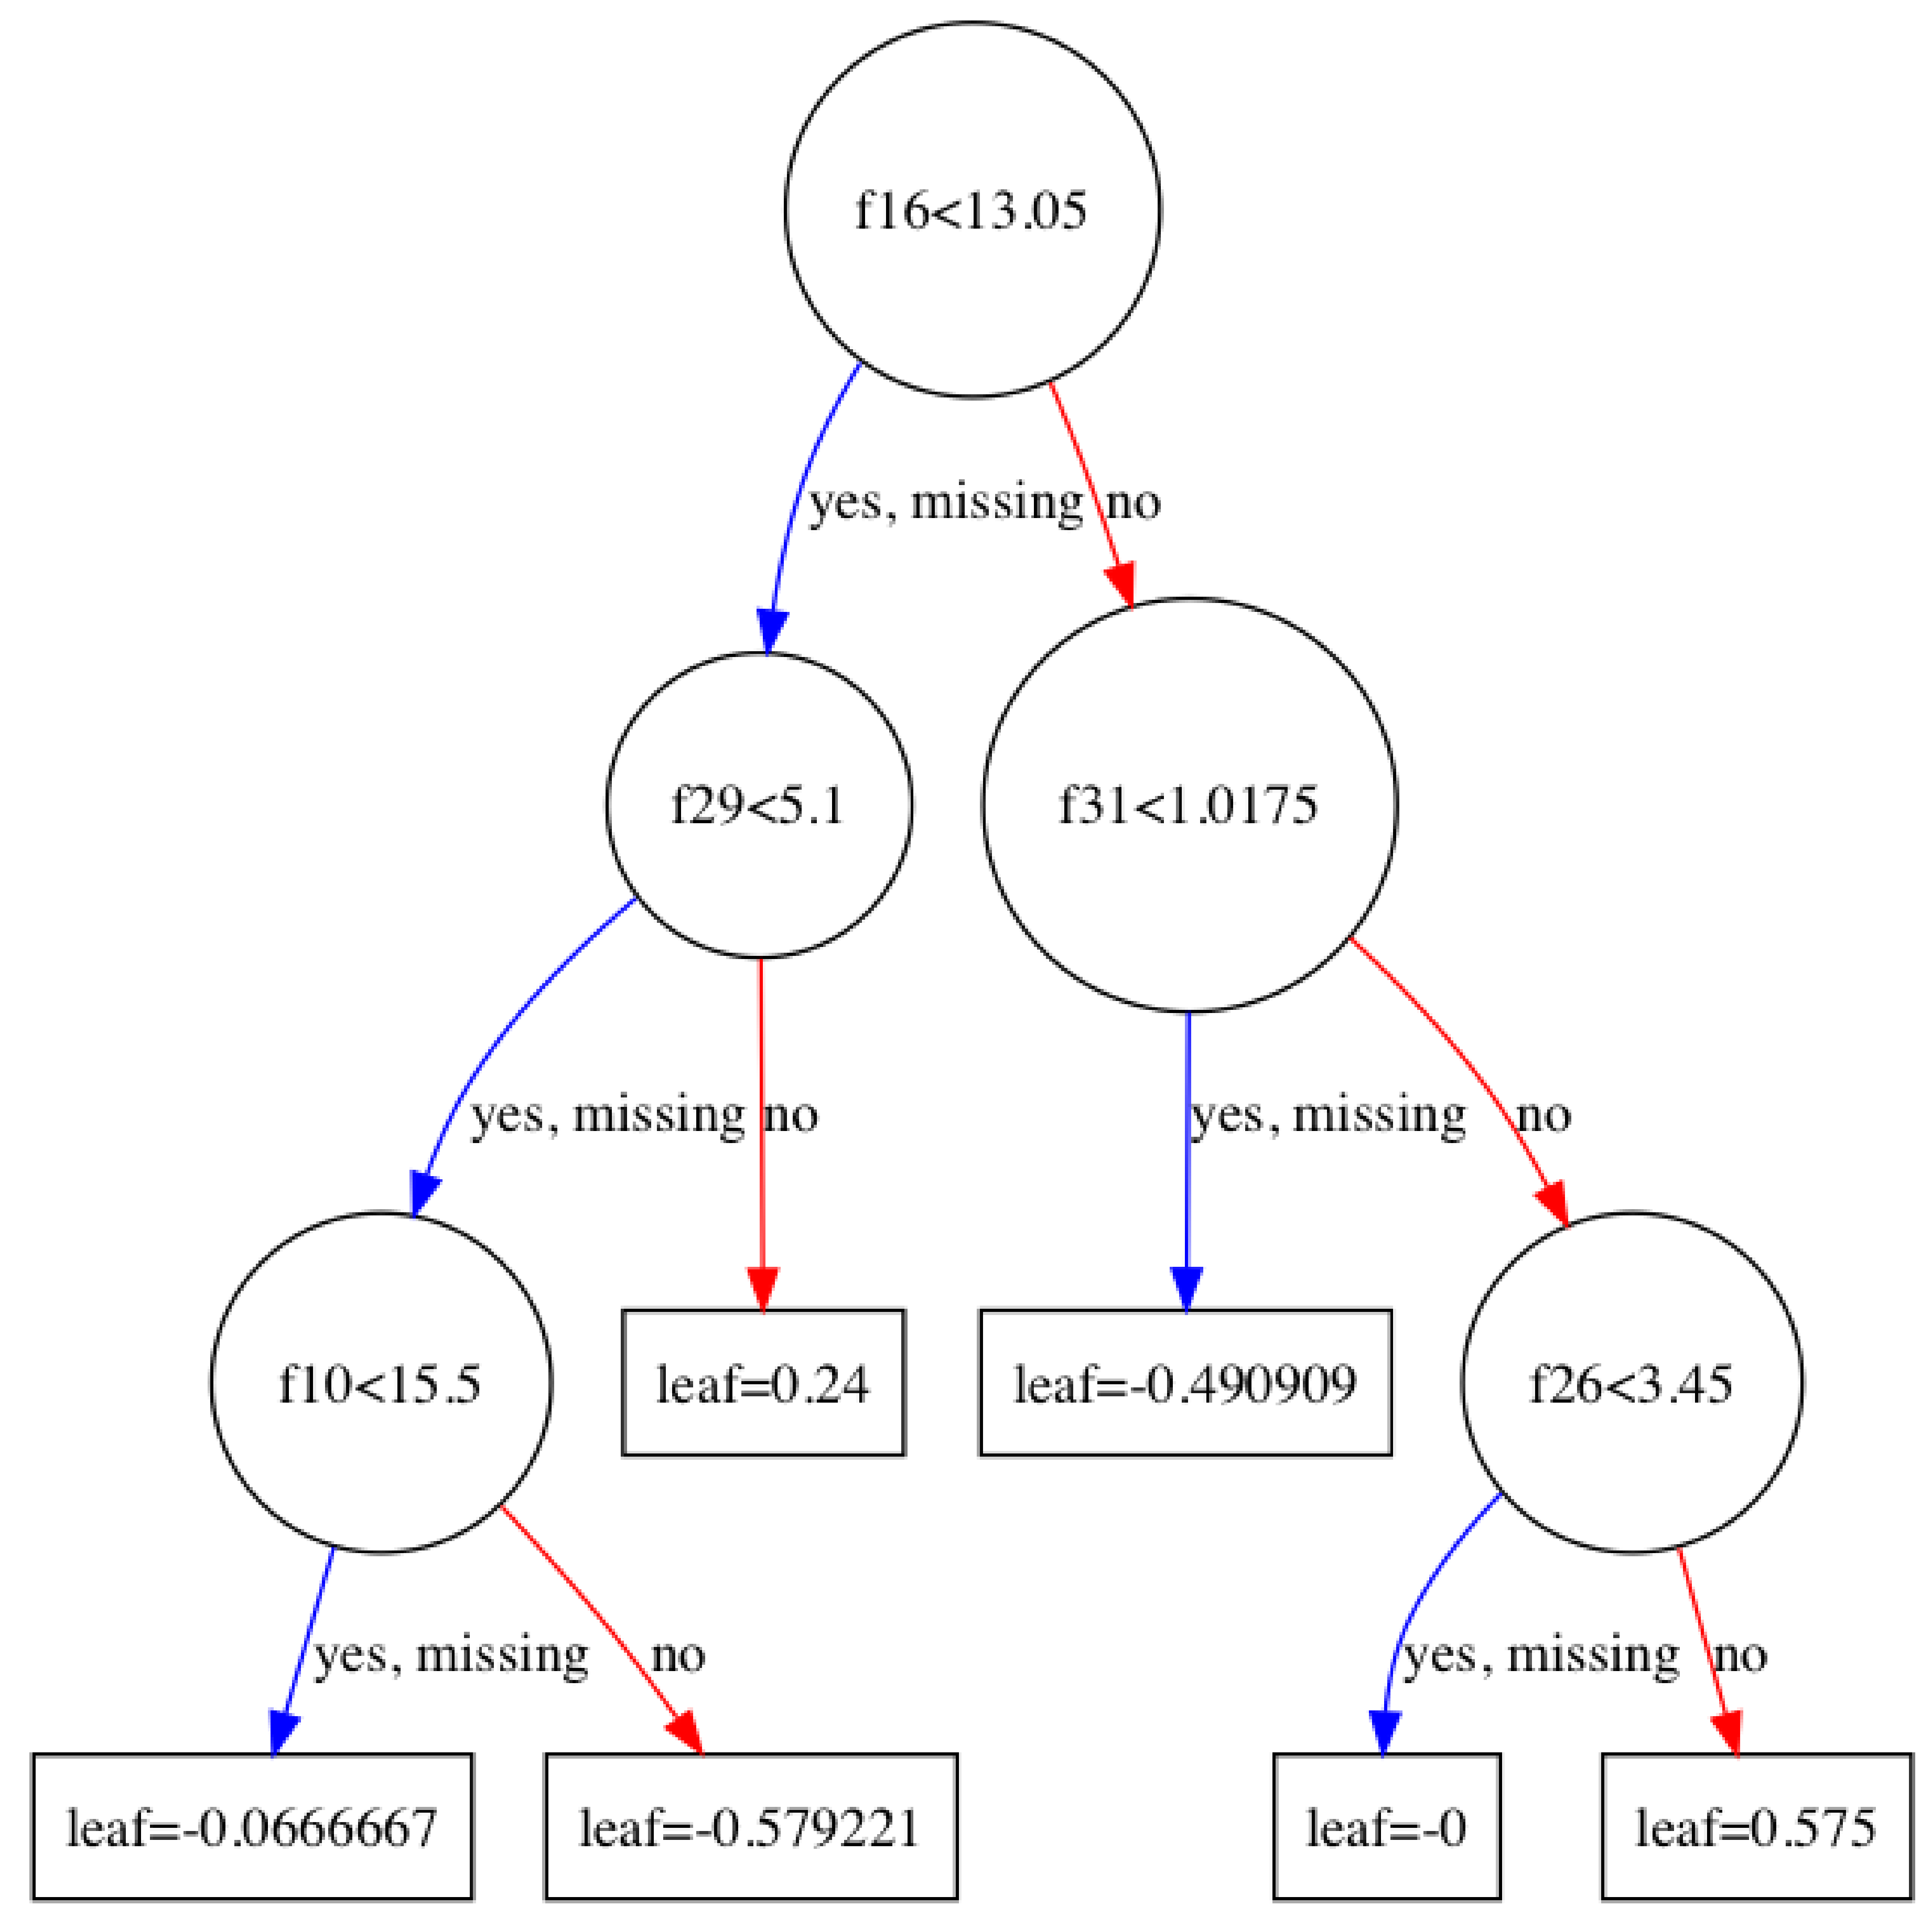

In [160]:
import matplotlib.pyplot as plt

# Train the model
xg_reg = xgb.train(dtrain=ckd_dmatrix, params=params, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(100, 67)
fig.savefig('tree.png')

# leaf weights at the bottom; but how is prediction ultimately made?  Is it not just voting among trees?
# replace f_ with feature name using dv.vocabulary_ ?

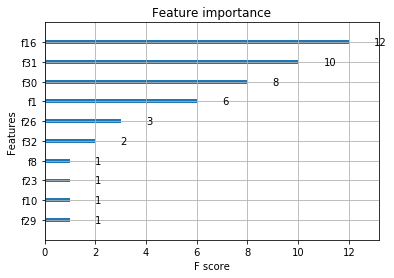

In [161]:
xgb.plot_importance(xg_reg)
plt.show()